In [73]:
import warnings
warnings.filterwarnings('ignore')
from math import sqrt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [ ]:
df = pd.read_csv("../data/one_train_denoised.csv",sep=',')
df['timestamp'] = pd.to_datetime(df.timestamp)
# df.set_index('timestamp',inplace=True,drop=True)

In [57]:
df['weekday'] = df.timestamp.apply(lambda x: x.isoweekday())
df['time'] = df.timestamp.apply(lambda x: x.timetuple())
df['day'] = df.time.apply(lambda x: x.tm_mday)
df['hour'] = df.time.apply(lambda x: x.tm_hour)
df['minute'] = df.time.apply(lambda x: x.tm_min)

In [62]:
df.head()

,timestamp,value,label,weekday,time,day,hour,minute
0,2017-05-01 00:00:00,1.901639,0,1,"(2017, 5, 1, 0, 0, 0, 0, 121, -1)",1,0,0
1,2017-05-01 00:01:00,1.786885,0,1,"(2017, 5, 1, 0, 1, 0, 0, 121, -1)",1,0,1
2,2017-05-01 00:02:00,2.000000,0,1,"(2017, 5, 1, 0, 2, 0, 0, 121, -1)",1,0,2
3,2017-05-01 00:03:00,1.885246,0,1,"(2017, 5, 1, 0, 3, 0, 0, 121, -1)",1,0,3
4,2017-05-01 00:04:00,1.819672,0,1,"(2017, 5, 1, 0, 4, 0, 0, 121, -1)",1,0,4


In [45]:
feature_df = df[['weekday','day','hour','minute']]
y = df['value']

In [51]:
train_x = feature_df[:80*24*60]
test_x = feature_df[80*24*60:]
train_y = y[:80*24*60]
test_y = y[80*24*60:]

In [89]:
from sklearn import cross_validation, metrics  
from sklearn.grid_search import GridSearchCV 
from sklearn.ensemble import GradientBoostingRegressor
gbdt = GradientBoostingRegressor()
params = {'n_estimators': (100,300,500,800), 'learning_rate': (0.005, 0.05, 0.1, 0.3),"max_depth":(2,3,4,5,6)}
grid = GridSearchCV(estimator=gbdt, param_grid=params, cv=5)
grid.fit(train_x,train_y)
# gbdt.fit(train_x,train_y)
# pred = gbdt.predict(test_x)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': (100, 300, 500, 800), 'learning_rate': (0.005, 0.05, 0.1, 0.3), 'max_depth': (2, 3, 4, 5, 6)},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [91]:
grid.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.005, loss='ls', max_depth=5,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=800,
             n_iter_no_change=None, presort='auto', random_state=None,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)

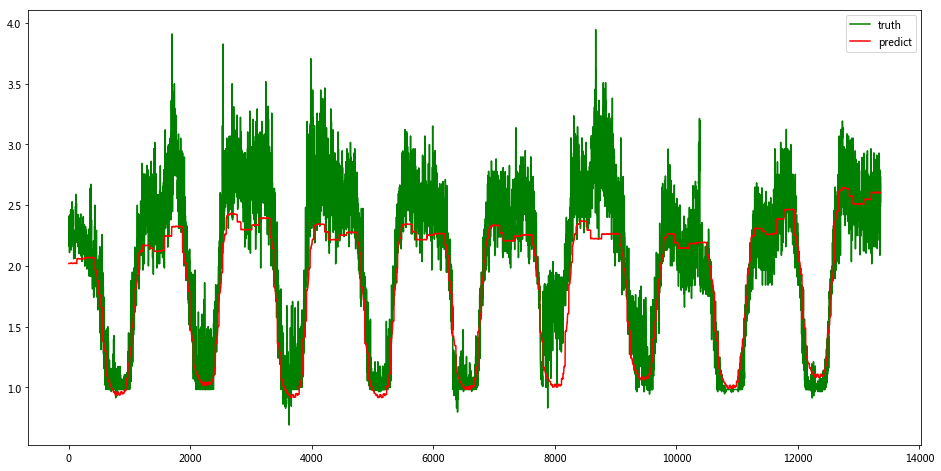

In [95]:
plt.figure(figsize=(16,8))
plt.plot(test_y.values,color='green',label='truth')
plt.plot(pred,color='red',label='predict')
# test_y.plot(color='green',lable='truth')
# pred.plot(color='red',lable='preditc')
plt.legend(loc='best')
plt.show()

In [80]:
print(mean_squared_error(test_y.values,pred))
print(gbdt.feature_importances_)
print(gbdt.train_score_)

0.104518846867
[ 0.22953671  0.20741289  0.50720091  0.05584949]
[ 0.30339021  0.25731757  0.21997783  0.18962972  0.16494672  0.14473809
  0.12835402  0.11487178  0.10371598  0.09463394  0.08713169  0.08092343
  0.07582926  0.07171596  0.06812508  0.06518807  0.06265592  0.06060906
  0.05880743  0.05741757  0.05604609  0.05503212  0.05398865  0.05318397
  0.05237952  0.05169753  0.05116038  0.05061936  0.05016934  0.04971376
  0.0493841   0.04890083  0.0483173   0.04794844  0.04748736  0.04716599
  0.04680761  0.04658141  0.04635559  0.04606772  0.04586078  0.04566169
  0.04543742  0.04524265  0.04505871  0.04458254  0.04443559  0.04407602
  0.04385786  0.04355703  0.04345263  0.04325381  0.04302965  0.04290156
  0.04278013  0.0427029   0.04258394  0.04248106  0.04226807  0.04219358
  0.04197433  0.04180009  0.04170775  0.04162611  0.0415656   0.04144973
  0.04138927  0.04134415  0.04127837  0.04114938  0.04100881  0.04096575
  0.04090706  0.04084202  0.04074351  0.04064451  0.0406083